In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import csv
import matplotlib.ticker as ticker
from matplotlib.patches import Circle

In [3]:
# Funcion para pasar de grados a mm en pantalla
def grados_a_mm(valor):
    return valor*5.25

def mm_a_grados(valor):
    return valor/5.25

In [4]:
sujeto,ojo = [1,2,3,4,5,6,7,8,9,10],['D','I']

In [5]:
Error_x,Error_y,Error_fijacion_x,Error_fijacion_y = [],[],[],[]
for i in range(9):
    for j in range(2):
        prueba = pd.read_csv(f'Prueba_error_{sujeto[i]}{ojo[j]}.csv',delimiter=';')
        for k in range(40):
            Error_x.append(prueba['Error X'][k])
            Error_y.append(prueba['Error Y'][k])
            Error_fijacion_x.append(prueba['Error Fijacion X'][k])
            Error_fijacion_y.append(prueba['Error Fijacion Y'][k])

In [6]:
column_names = ['Error estimulo','Error Fijacion']
with open('Analisis de error.csv', mode='w', newline='') as file:
    writer = csv.writer(file, delimiter=';')
    writer.writerow(column_names)
    for row in zip(Error_x,Error_y,Error_fijacion_x,Error_fijacion_y):
            # Formatear cada número con dos decimales y usar el punto como separador decimal
        formatted_row = [f'{value:.2f}' for value in row]
        writer.writerow(formatted_row)

## Histogramas

Mediana en Error_x: 0.311
Desviación Estandar en Error_x: 18.59312008572265


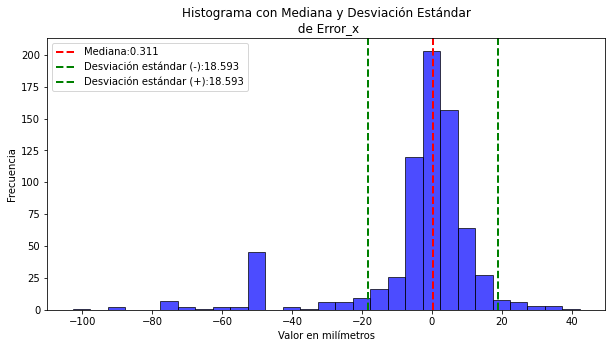

Mediana en Error_y: -0.956
Desviación Estandar en Error_y: 12.420014663464226


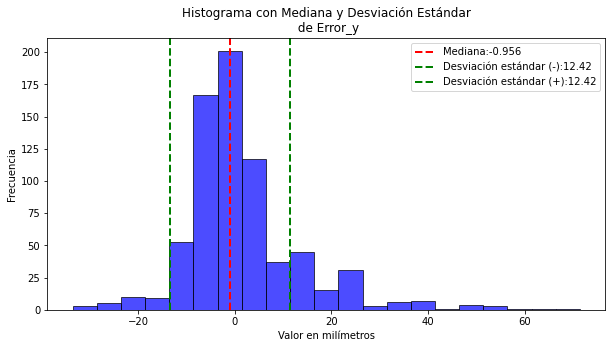

Mediana en Error_fijacion_x: 0.327
Desviación Estandar en Error_fijacion_x: 19.846519548862453


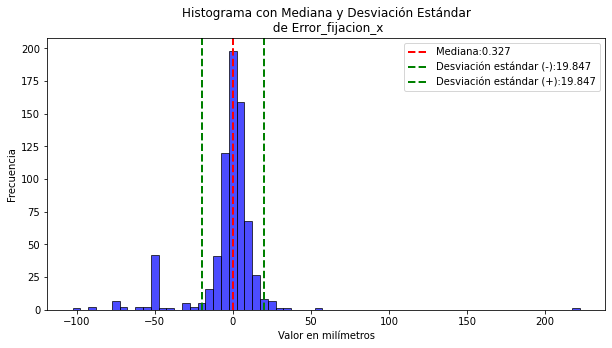

Mediana en Error_fijacion_y: -0.5
Desviación Estandar en Error_fijacion_y: 11.71941768949207


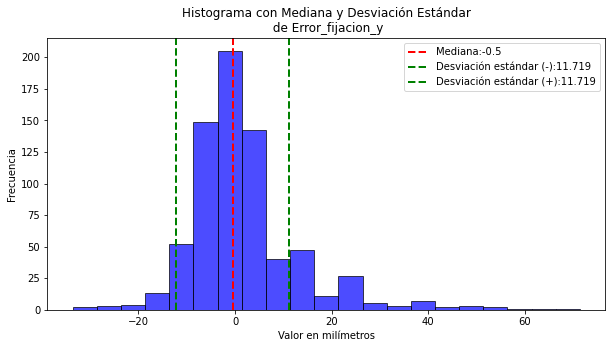

In [11]:
Columnas = [Error_x,Error_y,Error_fijacion_x,Error_fijacion_y]
nombre_columna = ['Error_x','Error_y','Error_fijacion_x','Error_fijacion_y']
for i in range(4):    
    median_value,std_dev = np.around(np.median(np.sort(Columnas[i])),decimals=3),np.around(np.std(Columnas[i]),decimals=3)
    print(f'Mediana en {nombre_columna[i]}:', median_value)
    print(f'Desviación Estandar en {nombre_columna[i]}:', np.std(Columnas[i]))
    # Crear el histograma
    plt.figure(figsize=(10,5))
    # Definir el ancho de los bins
    bin_width = 5
    # Calcular los bordes de los bins
    min_val = np.min(Columnas[i])
    max_val = np.max(Columnas[i])
    bin_edges = np.arange(min_val, max_val + bin_width, bin_width)
    plt.hist(Columnas[i], bins=bin_edges, edgecolor='black', alpha=0.7, color='blue')

    # Añadir líneas verticales para el valor medio y la desviación estándar
    plt.axvline(median_value, color='red', linestyle='dashed', linewidth=2, label=f'Mediana:{median_value}')
    plt.axvline(median_value - std_dev, color='green', linestyle='dashed', linewidth=2, label=f'Desviación estándar (-):{std_dev}')
    plt.axvline(median_value + std_dev, color='green', linestyle='dashed', linewidth=2, label=f'Desviación estándar (+):{std_dev}')

    # Añadir títulos y etiquetas
    plt.title(f'Histograma con Mediana y Desviación Estándar\n de {nombre_columna[i]}')
    plt.xlabel('Valor en milímetros')
    plt.ylabel('Frecuencia')
    plt.legend()

    # Mostrar el histograma
    plt.show()

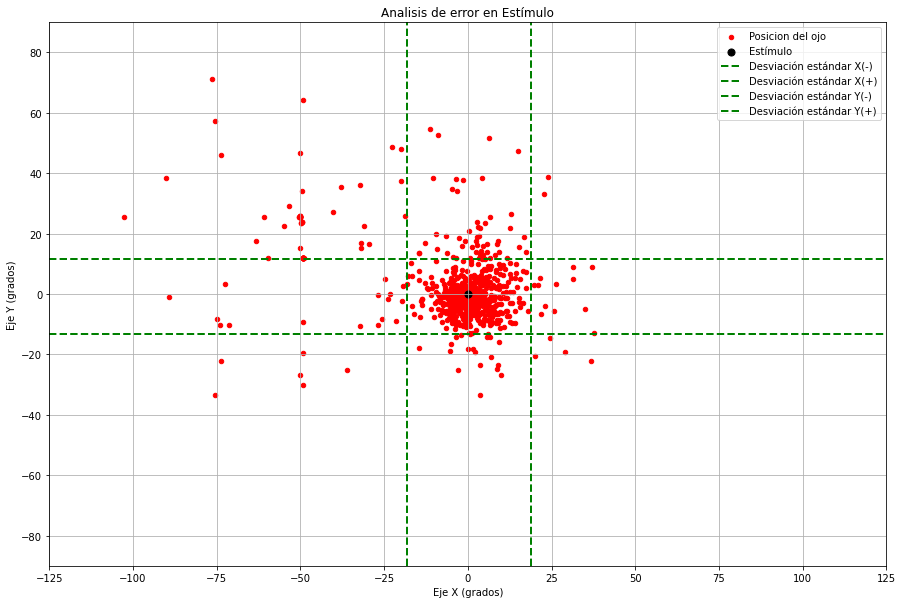

In [30]:
#Grafica de posiciones
plt.figure(figsize=(15,10))
plt.scatter(np.array(Columnas[0]), np.array(Columnas[1]), s=20,edgecolors='red',facecolors='red',label='Posicion del ojo')# Puntos grandes sin relleno
plt.scatter(0,0,s=50,edgecolors='black',facecolors='black',label='Estímulo')
# Configurar etiquetas y límites
plt.xlabel('Eje X (grados)');plt.ylabel('Eje Y (grados)')
plt.xlim(-125,125);plt.ylim(-90,90)
plt.grid(True,axis='both');plt.legend();plt.xticks(np.linspace(-125,125,11))
# Añadir líneas verticales para el valor medio y la desviación estándar
#plt.axvline(0.311, color='purple', linestyle='dashed', linewidth=2, label=f'Mediana X:{median_value}')
plt.axvline(0.311 - 18.59312008572265, color='green', linestyle='dashed', linewidth=2, label=f'Desviación estándar X(-)')
plt.axvline(0.311 + 18.59312008572265, color='green', linestyle='dashed', linewidth=2, label=f'Desviación estándar X(+)')

#plt.axhline(-0.956, color='purple', linestyle='dashed', linewidth=2, label=f'Mediana Y:{median_value}')
plt.axhline(-0.956 - 12.420014663464226, color='green', linestyle='dashed', linewidth=2, label=f'Desviación estándar Y(-)')
plt.axhline(-0.956 + 12.420014663464226, color='green', linestyle='dashed', linewidth=2, label=f'Desviación estándar Y(+)')


# Añadir circunferencias de cuadrícula
plt.title('Analisis de error en Estímulo')
plt.legend()
plt.show()

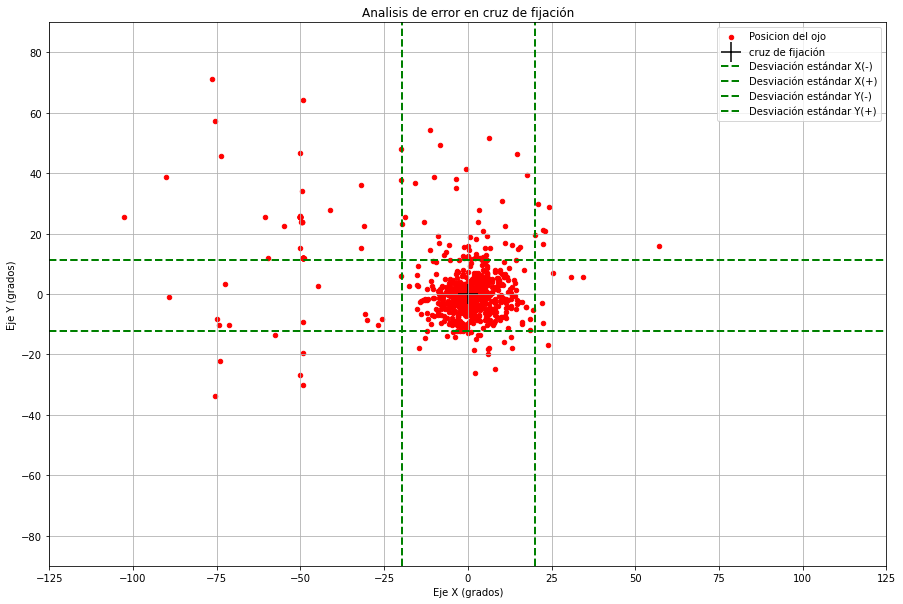

In [31]:
#Grafica de posiciones
plt.figure(figsize=(15,10))
plt.scatter(np.array(Columnas[2]), np.array(Columnas[3]), s=20,edgecolors='red',facecolors='red',label='Posicion del ojo')# Puntos grandes sin relleno
plt.scatter(0,0,s = 400,marker='+',color='black',label='cruz de fijación')
# Configurar etiquetas y límites
plt.xlabel('Eje X (grados)');plt.ylabel('Eje Y (grados)')
plt.xlim(-125,125);plt.ylim(-90,90)
plt.grid(True,axis='both');plt.legend();plt.xticks(np.linspace(-125,125,11))
# Añadir líneas verticales para el valor medio y la desviación estándar
#plt.axvline(0.327, color='purple', linestyle='dashed', linewidth=2, label=f'Mediana X:{median_value}')
plt.axvline(0.327 - 19.846519548862453, color='green', linestyle='dashed', linewidth=2, label=f'Desviación estándar X(-)')
plt.axvline(0.327 + 19.846519548862453, color='green', linestyle='dashed', linewidth=2, label=f'Desviación estándar X(+)')

#plt.axhline(-0.5, color='purple', linestyle='dashed', linewidth=2, label=f'Mediana Y:{median_value}')
plt.axhline(-0.5 - 11.71941768949207, color='green', linestyle='dashed', linewidth=2, label=f'Desviación estándar Y(-)')
plt.axhline(-0.5 + 11.71941768949207, color='green', linestyle='dashed', linewidth=2, label=f'Desviación estándar Y(+)')

plt.title('Analisis de error en cruz de fijación')
plt.legend()
plt.show()